In [52]:
import numpy as np
from scipy import integrate
from functions import base_function, integral_p

Функция с методом calculate, которая должна быть унаследована от базовой функции

In [53]:
class MyFunc(base_function.BaseFunction):

    def __init__(self, params=None):
        pass

    def calculate(self, y):
        return y * y

In [54]:
integral = integral_p.IntegralP(MyFunc())

Интеграл считается по формуле Симпсона
$$\int_a^b f(x) \approx \frac{h}{3} * \big [f_0(x) + 4f_1(x) + 2f_2(x) + 4f_3(x) + ... + 4f_{N - 1}(x) + f_N(x) \big] $$

В метод calculate подаётся два аргумента: верхняя граница интегрирования(нижняя равна 0) и число отрезочков, на которые делится интервал. Число отрезков потом умножается на два в функции интегрирования

In [55]:
integral.calculate(2, 128)

2.6666666666666665

Формула погрешности
$$\left|E(f)\right|\leqslant {\frac  {(b-a)}{2880}}h^{4}\max \limits _{{x\in [a,b]}}|f^{{(4)}}(x)|. $$

Введём гладкую, разрывную и осцилирующую функции

In [56]:
class ContinuousFunc(base_function.BaseFunction):

    def __init__(self, params=None):
        pass

    def calculate(self, y):
        return y ** 7

In [57]:
class NonContinuousFunc(base_function.BaseFunction):
    
    def __init__(self, params=None):
        pass

    def calculate(self, y):
        return y * y if y < 1 else -y

In [58]:
class OscillatingFunction(base_function.BaseFunction):
    
    def __init__(self, params=None):
        pass

    def calculate(self, y):
        return np.cos(1000 * y)

In [59]:
cont_func = ContinuousFunc()
non_cont_func = NonContinuousFunc()
osc_func = OscillatingFunction()

integral_cont = integral_p.IntegralP(cont_func)
integral_non_cont = integral_p.IntegralP(non_cont_func)
integral_osc = integral_p.IntegralP(osc_func)

In [60]:
my_int = integral_cont.calculate(5, 10000)
scipy_int = integrate.quad(lambda x: cont_func.calculate(x), 0, 5)
print("my integral of continious function:", my_int)
print("scipy integral of continious function: {} with error no more than: {}".format(scipy_int[0], scipy_int[1]))
print("total difference is {}, which is {}%".format(np.abs(scipy_int[0] - my_int),
                                                    np.abs(100 * (scipy_int[0] - my_int) / scipy_int[0])))

my integral of continious function: 48828.125
scipy integral of continious function: 48828.12500000001 with error no more than: 5.421010862427523e-10
total difference is 1.8189894035458565e-10, which is 3.7252902984619137e-13%


In [61]:
my_int = integral_non_cont.calculate(5, 10000)
scipy_int = integrate.quad(lambda x: non_cont_func.calculate(x), 0, 5)
print("my integral of non continious function:", my_int)
print("scipy integral of non continious function: {} with error no more than: {}".format(scipy_int[0], scipy_int[1]))
print("total difference is {}, which is {}%".format(np.abs(scipy_int[0] - my_int),
                                                    np.abs(100 * (scipy_int[0] - my_int) / scipy_int[0])))

my integral of non continious function: -11.6668333333
scipy integral of non continious function: -11.66666666666125 with error no more than: 8.44332070926157e-09
total difference is 0.00016666667207232422, which is 0.0014285714749062994%


In [62]:
my_int = integral_osc.calculate(5, 10000)
print("my integral of non continious function:", my_int)
print("real int is:", np.sin(5) / 1000)
print("total difference is {}, which is {}%".format(np.sin(5) / 1000 - my_int,
                                                    np.abs(100 * (np.sin(5) / 1000 - my_int) / (np.sin(5) / 1000))))

my integral of non continious function: -0.000987988039593
real int is: -0.000958924274663
total difference is 2.906376492976229e-05, which is 3.030871748446678%


Построим график в осях $ (log(X), log(E(X))) $, где х -- это количество отрезков, на который мы разбиваем наш отрезок

In [63]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

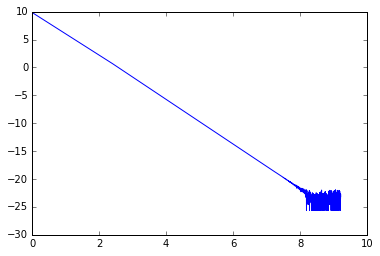

In [64]:
x = []
y = []
for i in range(1, 10000, 10):
    high_limit = 5
    my_int = integral_cont.calculate(high_limit, i)
    real_int = (high_limit ** 8) / 8
    x.append(np.log(i))
    #y.append((np.abs((real_int - my_int) / real_int)))
    y.append(np.log(np.abs(real_int - my_int)))
plt.plot(x ,y)
plt.show()

$$ log(X) = 4 \Rightarrow X \approx 54.6$$
$$ log(X) = 6 \Rightarrow X \approx 403$$
Возьмём эти $ X $ и посчитает две точки, которыми и зададим прямую, описывающую "хвост"

In [65]:
x1 = np.log(55)
y1 = np.log(np.abs(5 ** 8 / 8 - integral_cont.calculate(5, 55)))
x2 = np.log(403)
y2 = np.log(np.abs(5 ** 8 / 8 - integral_cont.calculate(5, 403)))

print("X: 2980, log(X): {}, log(err): {}".format(x1, y1))

print("X: 403, log(X): {}, log(err): {}".format(x2, y1))

X: 2980, log(X): 4.007333185232471, log(err): -5.772385551943515
X: 403, log(X): 5.998936561946683, log(err): -5.772385551943515


Итак, решим систему уравнений
$$ y_1 = k * x_1 + b$$
$$ y_2 = k * x_2 + b$$
$$ k = \frac{y_2 - y_1}{x_2 - x_1} $$

In [66]:
k = (y2 - y1) / (x2 - x1)
print(np.abs(k))

3.99993583125


$$ X = 5 * h $$
$$ log(err(5h)) = k * log(X) + b $$
$$ log(err(5h)) - log(X^k) = b $$
$$ log(\frac{err(5h)}{X^k}) = b $$
$$ \frac{err(5h)}{X^k} = e^b $$
Получается, $k$ -- это порядок аппроксимации